#<center>**Cars Clustering**</center>

### **Introduction**

In this project, I will be performing an unsupervised clustering of data on the cars origin records.

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

### **Outline**



1.   **Importing Libraries**

2.   **Loading Data**

3.   **Data Preprocessing**

4.   **Evaluating Models**

5.   **Profiling**





let's start

### **1. Importing Libraries**

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings

### **2. Loading Data**

In [ ]:
#load the data
data = pd.read_table("cars-origin.txt")
data.head()

,Numero,mpg,displacement,horsepower,weight,acceleration,origin
0,1,35,72,69,1613,18,asian
1,2,31,76,52,1649,17,asian
2,3,39,79,58,1755,17,asian
3,4,35,81,60,1760,16,asian
4,5,31,71,65,1773,19,asian


In [ ]:
#Count the number of rows and columns in the dataset
data.shape

(392, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Numero        392 non-null    int64 
 1   mpg           392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    int64 
 6   origin        392 non-null    object
dtypes: int64(6), object(1)
memory usage: 21.6+ KB


In [ ]:
data.describe()

,Numero,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,196.500000,23.492347,194.410714,104.469388,2977.584184,15.681122
std,113.304898,7.799924,104.645191,38.491160,849.402560,2.761232
min,1.000000,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,98.750000,17.000000,105.000000,75.000000,2225.250000,14.000000
50%,196.500000,23.000000,151.000000,93.500000,2803.500000,16.000000
75%,294.250000,29.000000,275.750000,126.000000,3614.750000,17.000000
max,392.000000,47.000000,455.000000,230.000000,5140.000000,25.000000


### **3. Data Preprocessing**

In [ ]:
data.drop(['Numero'], axis='columns', inplace=True)
data.drop(['origin'], axis='columns', inplace=True)

In [ ]:
data.head()

,mpg,displacement,horsepower,weight,acceleration
0,35,72,69,1613,18
1,31,76,52,1649,17
2,39,79,58,1755,17
3,35,81,60,1760,16
4,31,71,65,1773,19


In [ ]:
data_kmeans = data.copy()
data_he = data.copy()

[texte du lien](https://)###**4. Evaluating Models**

**a)Kmeans**

Text(0, 0.5, 'Inertia')

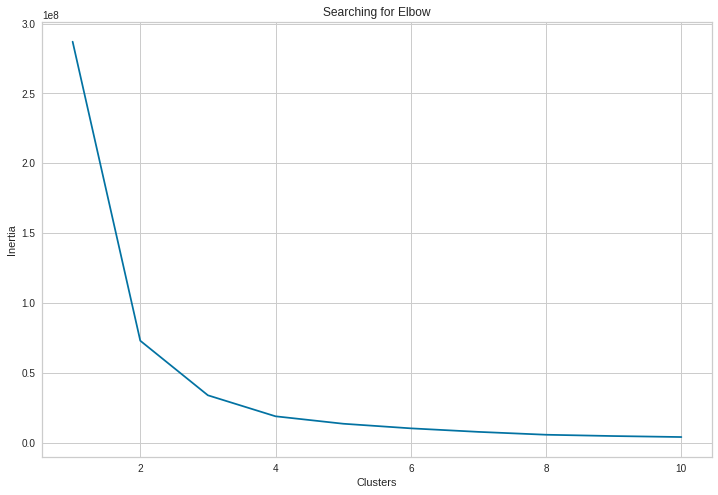

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data_kmeans)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=2).fit(data_kmeans)

data_kmeans['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data_kmeans['mpg'], data_kmeans['horsepower'], hue=data_kmeans['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

<Figure size 864x576 with 0 Axes>

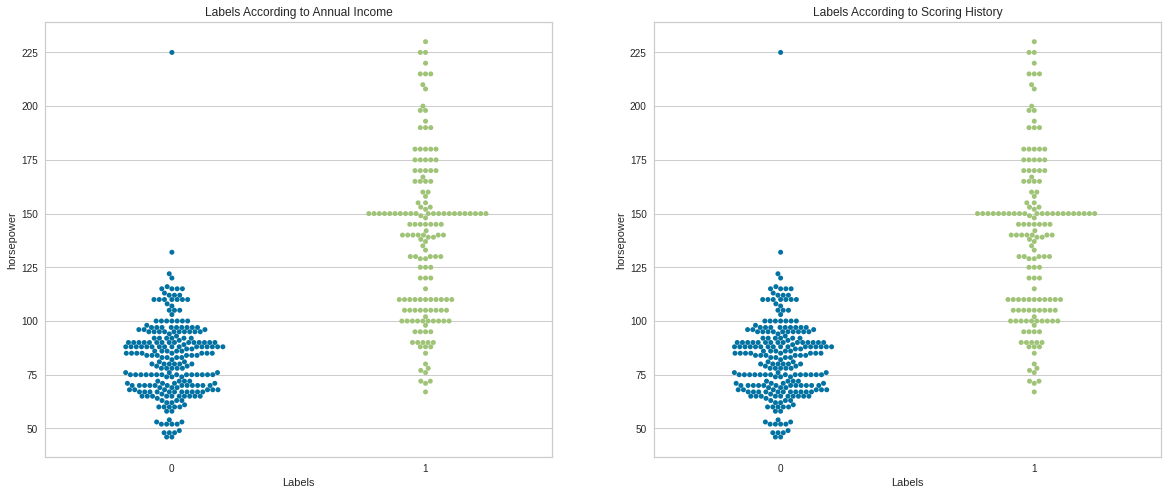

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='horsepower', data=data_kmeans, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='horsepower', data=data_kmeans, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

In [ ]:
import plotly as py
import plotly.graph_objs as go
trace1 = go.Scatter3d(
    x= data_kmeans['mpg'],
    y= data_kmeans['displacement'],
    z= data_kmeans['weight'],
    mode='markers',
     marker=dict(
        color = data_kmeans['Labels'], 
        size= 10,
        line=dict(
            color= data_kmeans['Labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'mpg'),
            yaxis = dict(title  = 'displacement'),
            zaxis = dict(title  = 'weight')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

**b) Hierarchical Clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

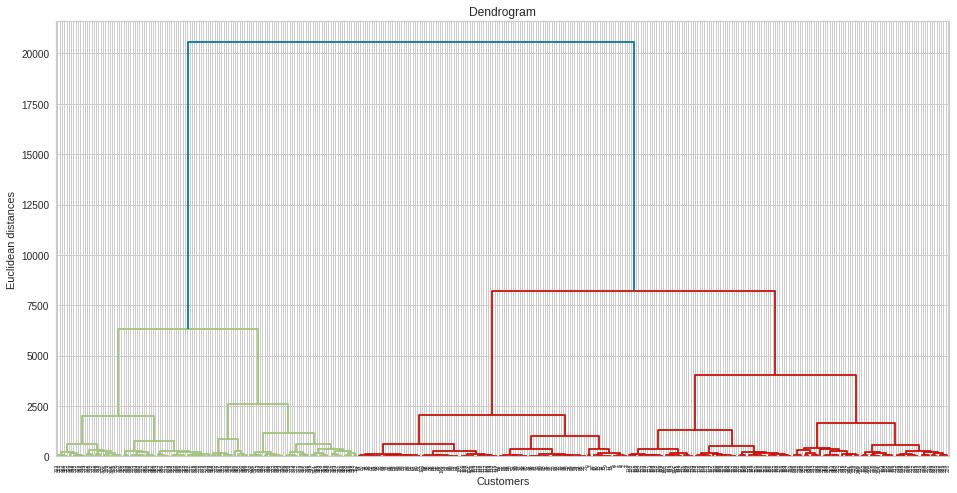

In [ ]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(data_he, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(data_he)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data_he['cluster'] = pd.DataFrame(y_hc)

In [ ]:
trace1 = go.Scatter3d(
    x= data_he['mpg'],
    y= data_he['displacement'],
    z= data_he['weight'],
    mode='markers',
     marker=dict(
        color = data_he['cluster'], 
        size= 10,
        line=dict(
            color= data_he['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'mpg'),
            yaxis = dict(title  = 'displacement'),
            zaxis = dict(title  = 'weight')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

###**5. Profiling**

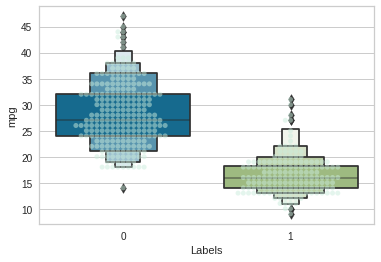

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["mpg"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["mpg"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



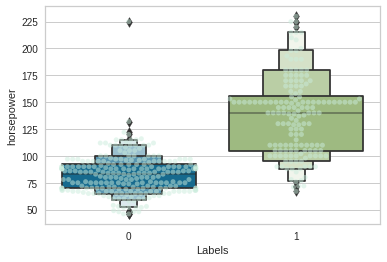

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["horsepower"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["horsepower"])
plt.show()

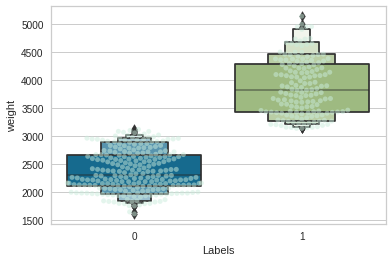

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["weight"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["weight"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



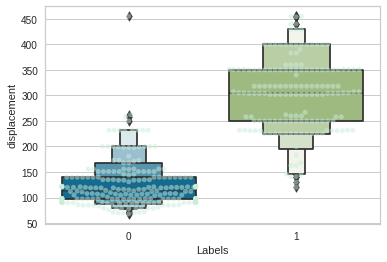

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["displacement"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["displacement"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



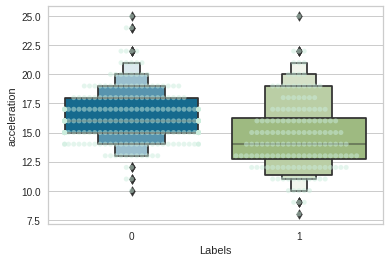

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["acceleration"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["acceleration"])
plt.show()